<!-- <div style="display: flex; justify-content: center; align-items: center; height: 100px; width: 100%; background-color: pink; border-radius: 25px; text-align: center; font-size: 20px; font-weight: bold; color: white; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);"> -->
<div style="background-color: gray; border-radius: 25px 25px 0 0; padding: 20px; text-align: center; font-family: Arial, sans-serif; color: white;">
    <h1 style="margin: 0;">POTATO DISEASE LEAF</h1>
</div>

`About the auther`
- Name : Israa Abdelghany Ibrahim
- LinkedIn : https://www.linkedin.com/in/israa-abdelghany/
- GitHub : https://github.com/IsraaAbdelghany9

`About the Data`

The dataset contains images of potato leaves categorized into three classes:

- Early Blight

- Late Blight

- Healthy

Each image is labeled and used for training a model to detect diseases in potato plants. The goal is to build a classification model that can accurately identify the condition of the leaf based on visual patterns.

🏷️ Class Descriptions

- **Early Blight**  
  A fungal disease caused by *Alternaria solani*. It appears as **dark spots with concentric rings** on older leaves. If untreated, it can spread and reduce crop yield.

- **Late Blight**  
  Caused by *Phytophthora infestans*, this is a serious disease that spreads quickly. Symptoms include **brown or black lesions** with yellow edges, especially in humid conditions.

- **Healthy**  
  Leaves show **no signs of disease**—they appear green and uniform with no spots, discoloration, or visible damage.


`Link for Dataset`


https://www.kaggle.com/datasets/rizwan123456789/potato-disease-leaf-datasetpld/data



## `01` Import Libraries 

In [ ]:
import pandas as pd  
import numpy as  np  
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from numpy import random

import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow as tf
import random

from PIL import Image
# from skimage import exposure
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
# import keras_tuner
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation,Dropout,BatchNormalization,InputLayer

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from sklearn.utils import class_weight


from tensorflow.keras.optimizers import Adadelta, Adam

from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


2025-05-01 01:57:26.792788: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-01 01:57:27.118144: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746053847.235024   11725 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746053847.266347   11725 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746053847.481264   11725 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

`Test GPUs`

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth enabled for:", gpus)
    except RuntimeError as e:
        print("Error:", e)
else:
    print("No GPU found")

Memory growth enabled for: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## `02` Global Variables

In [4]:
IMAGE_SIZE = 128
BATCH_SIZE = 32
CHANNELS = 3

EPOCHS = 50

NUM_SAMPLES = 4

## `03` Read Data

In [5]:
data_dir = '/home/israa/Desktop/Computer_Vision_Projects/01-Potato_Disease_Leaf/PLD_3_Classes_256'

# Update train_dir to use an absolute path
early_bight_path = healthy_bath = os.path.join(data_dir, 'Training/Early_Blight')
healthy_bath = os.path.join(data_dir, 'Training/Healthy')
late_bight_path = os.path.join(data_dir, 'Training/Late_Blight')

early_train_files = [os.path.join(early_bight_path, filename) for filename in os.listdir(early_bight_path)]
healthy_train_files = [os.path.join(healthy_bath, filename) for filename in os.listdir(healthy_bath)]
late_train_files = [os.path.join(late_bight_path, filename) for filename in os.listdir(late_bight_path)]


## `04` Simple EDA

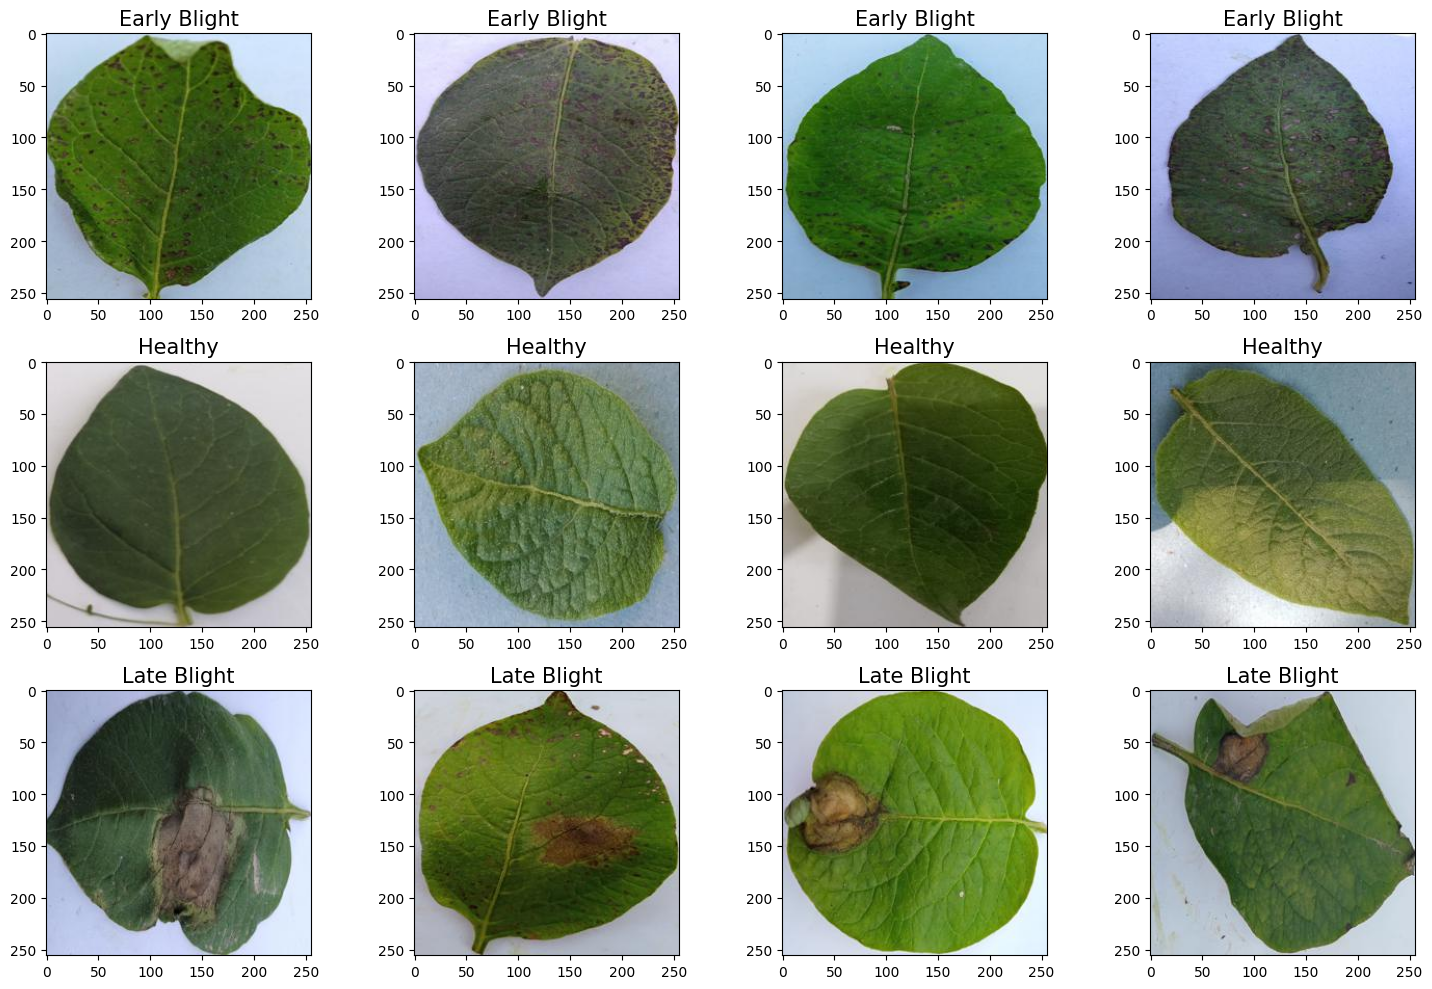

In [6]:
# Create subplots for displaying images
fig, axes = plt.subplots(3, NUM_SAMPLES, figsize=(15, 10))

# Displaying Early Blight images
early_sample = np.random.choice(early_train_files, NUM_SAMPLES, replace=False)
for i, image_path in enumerate(early_sample):
    ax = axes[0, i]
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title('Early Blight', fontsize=15)  
    ax.axis('on')  # Show axis


# Displaying Healthy images
healthy_sample = np.random.choice(healthy_train_files, NUM_SAMPLES, replace=False)
for i, image_path in enumerate(healthy_sample):
    ax = axes[1, i]
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title('Healthy', fontsize=15)  
    ax.axis('on')  # Show axis

# Displaying Late Blight images
late_sample = np.random.choice(late_train_files, NUM_SAMPLES, replace=False)
for i, image_path in enumerate(late_sample):
    ax = axes[2, i]
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title('Late Blight', fontsize=15)  
    ax.axis('on')  # Show axis


plt.tight_layout()  

## `05` Preprocessing

### Rescaling Images for Better Training Performance

Rescaling the images by dividing pixel values by 255 (i.e., `rescale=1./255`) is a **normalization** technique that helps simplify the image matrices.

### Why is this helpful?

*   **Pixel Value Range**: The original pixel values in an image range from 0 to 255. By dividing by 255, you're scaling the pixel values to a range between **0 and 1**.
    
*   **Improved Model Training**: Neural networks generally perform better and converge faster when the input data is normalized, because:
    
    *   It helps the optimizer converge more quickly (gradient descent works better with smaller, consistent values).
        
    *   It reduces the risk of numerical instability during training.
        
    *   It makes training more efficient by ensuring that each input feature (pixel) has similar scales.

### In Short:

*   **Rescaling** doesn't "simplify" the images in terms of content, but it **simplifies the data** by making the numerical values more manageable and consistent. This leads to **faster training** and **more stable training dynamics**.


In [7]:
# 1. Create ImageDataGenerator objects for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# 2. Create generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Training'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(os.path.join(data_dir, 'Validation'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(os.path.join(data_dir, 'Testing'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [9]:
# 3. Check the class indices
print("Class Index Mapping:", train_generator.class_indices)

# 4. Check the number of classes
num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)

# 5. Check the number of samples in each generator
print("Number of training samples:", len(train_generator.filenames))
print("Number of validation samples:", len(valid_generator.filenames))
print("Number of testing samples:", len(test_generator.filenames))


Class Index Mapping: {'Early_Blight': 0, 'Healthy': 1, 'Late_Blight': 2}
Number of classes: 3
Number of training samples: 3251
Number of validation samples: 416
Number of testing samples: 405


In [10]:
# 6. Check the shape of the images
sample_image, sample_label = next(train_generator)
print("Shape of sample image:", sample_image.shape)

# 7. Check the shape of the labels
print("Shape of sample label:", sample_label.shape)

# The sample is the size of the batch, which is 32 in this case.

Shape of sample image: (32, 128, 128, 3)
Shape of sample label: (32, 3)


In [11]:
# 8. Check the class distribution in the training set
class_counts = np.bincount(train_generator.classes)
class_distribution = dict(zip(train_generator.class_indices.keys(), class_counts))
print("Class distribution in training set:", class_distribution)


Class distribution in training set: {'Early_Blight': 1303, 'Healthy': 816, 'Late_Blight': 1132}


## `06` Data Visualization 

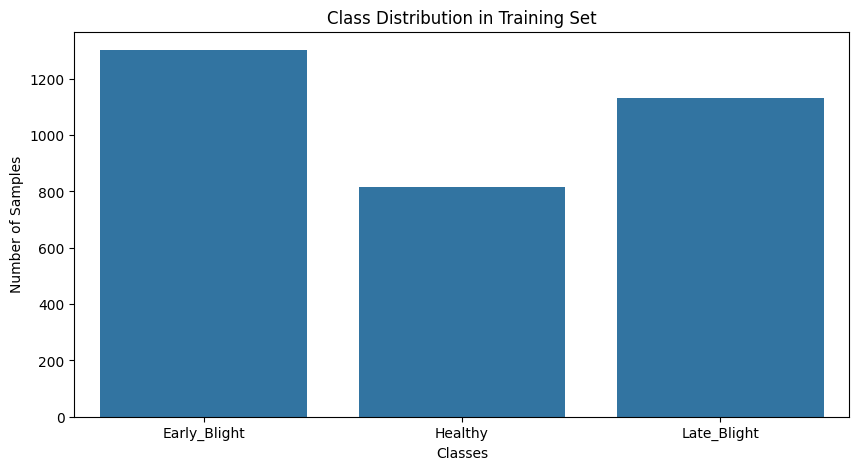

In [12]:
# 9. Visualize the class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title('Class Distribution in Training Set')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.show()

The data is quiete balanced

remember that we have used a generator for the train data 

## `07` Model 

### `07.1` Pretrained model

In [13]:
# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

Class Weights: {0: 0.8316705039652085, 1: 1.3280228758169934, 2: 0.9573027090694936}


In [14]:
# Load EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)  # Add L2 regularization
x = Dropout(0.4)(x)

predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.summary()


I0000 00:00:1746053863.489369   11725 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4269 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 128, 128,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 128, 128,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 129, 129,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 64, 64,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 64, 64,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 64, 64,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 64, 64,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 64, 64,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 64, 64,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 64, 64,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 64, 64,    │        512 │ block1a_se_excit

 Total params: 4,706,982 (17.96 MB)

 Trainable params: 4,664,959 (17.80 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, verbose=1),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
]

In [17]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    class_weight=class_weights,
    callbacks=callbacks
)

Epoch 1/50


I0000 00:00:1746053927.684736   12015 service.cc:152] XLA service 0x76dcd80017e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746053927.684836   12015 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-05-01 01:58:49.588657: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746053941.097162   12015 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-01 01:59:09.990063: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19522', 204 bytes spill stores, 204 bytes spill loads

2025-05-01 01:59:10.040417: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fu

 42/102 ━━━━━━━━━━━━━━━━━━━━ 17s 288ms/step - accuracy: 0.7105 - loss: 6.7312

2025-05-01 02:00:42.032230: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19522', 220 bytes spill stores, 220 bytes spill loads

2025-05-01 02:00:42.254862: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19522_0', 444 bytes spill stores, 1384 bytes spill loads

2025-05-01 02:00:42.398263: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19522', 8 bytes spill stores, 8 bytes spill loads

2025-05-01 02:00:43.299105: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19522', 5524 bytes spill stores, 5564 bytes spill loads

2025-05-01 02:00:45.190070:

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7976 - loss: 5.1864

2025-05-01 02:02:14.004138: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2093', 48 bytes spill stores, 48 bytes spill loads

2025-05-01 02:02:14.049725: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2093', 208 bytes spill stores, 208 bytes spill loads

2025-05-01 02:02:14.344216: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2093', 264 bytes spill stores, 264 bytes spill loads




Epoch 1: val_loss improved from inf to 4.32745, saving model to best_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.7984 - loss: 5.1669 - val_accuracy: 0.2452 - val_loss: 4.3275 - learning_rate: 0.0010
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.9627 - loss: 0.4859
Epoch 2: val_loss improved from 4.32745 to 3.23031, saving model to best_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 36s 348ms/step - accuracy: 0.9626 - loss: 0.4847 - val_accuracy: 0.2452 - val_loss: 3.2303 - learning_rate: 0.0010
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9405 - loss: 0.2584
Epoch 3: val_loss did not improve from 3.23031
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 299ms/step - accuracy: 0.9406 - loss: 0.2582 - val_accuracy: 0.2452 - val_loss: 5.8788 - learning_rate: 0.0010
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.9702 - loss: 0.1578
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 4: val_l

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print()
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9836 - loss: 0.0558

2025-05-01 02:14:02.898319: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2093', 8 bytes spill stores, 8 bytes spill loads

2025-05-01 02:14:03.336989: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2086_0', 444 bytes spill stores, 1384 bytes spill loads

2025-05-01 02:14:03.380268: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2086', 220 bytes spill stores, 220 bytes spill loads

2025-05-01 02:14:03.522549: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2093', 224 bytes spill stores, 224 bytes spill loads

2025-05-01 02:14:03.798654: I ext

13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9842 - loss: 0.0550 
Test Loss: 0.05010652542114258
Test Accuracy: 0.9876543283462524

Train Loss: 0.03915685787796974
Train Accuracy: 0.9907720685005188


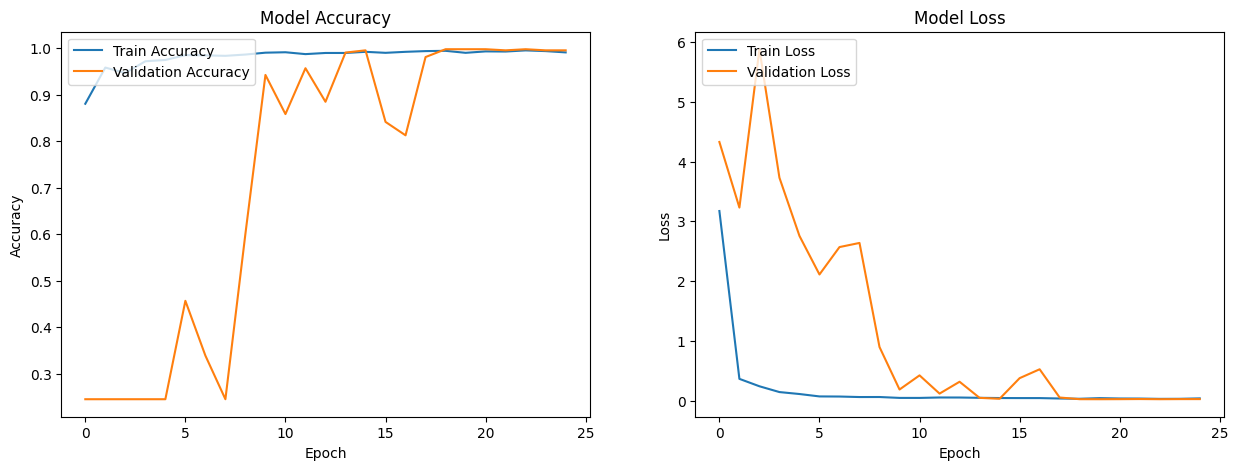

In [19]:
# Plot training & validation accuracy values
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'], label='Train Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(loc='upper left')
# Plot training & validation loss values
axes[1].plot(history.history['loss'], label='Train Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(loc='upper left')
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 596ms/step


Text(95.58159722222221, 0.5, 'True Label')

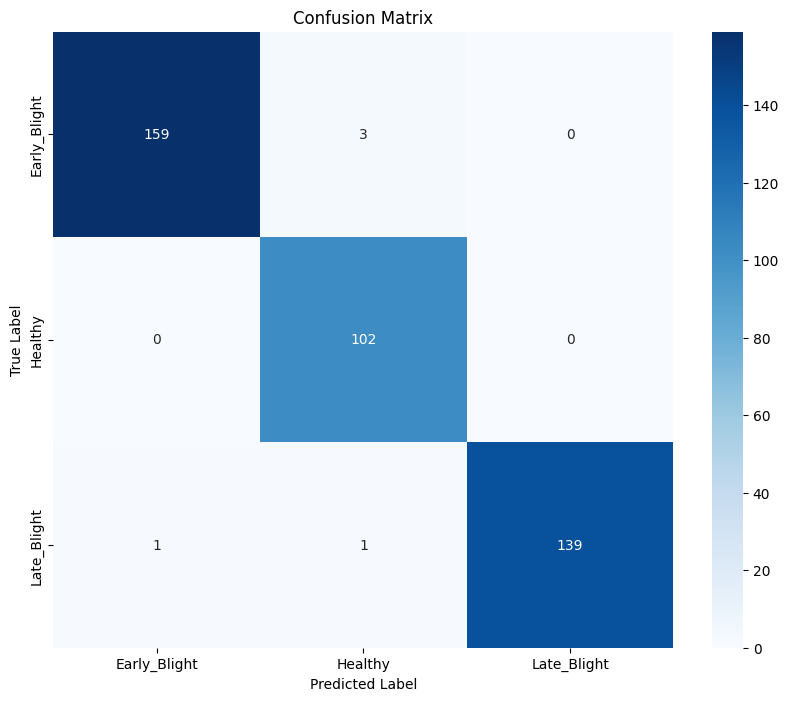

In [20]:
# Get the true labels and predicted labels
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
# Get the class labels
class_labels = list(test_generator.class_indices.keys())
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predicted class: Late_Blight


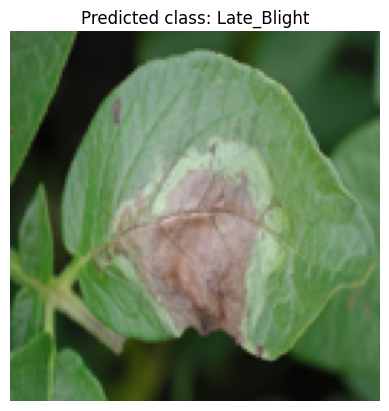

In [21]:
# Try to predict the class of a new image
image = Image.open('/home/israa/Desktop/Computer_Vision_Projects/01-Potato_Disease_Leaf/test_random_img/Halo.jpg')
image = image.resize((IMAGE_SIZE, IMAGE_SIZE))
image = np.array(image) 
image = image / 255.0
image = np.expand_dims(image, axis=0)  # Add batch dimension
predicted_class = model.predict(image)
predicted_class_index = np.argmax(predicted_class, axis=1)[0]
predicted_class_label = list(test_generator.class_indices.keys())[predicted_class_index]
print("Predicted class:", predicted_class_label)
# Display the image
plt.imshow(image[0])
plt.axis('off')
plt.title('Predicted class: ' + predicted_class_label)
plt.show()

### `07.2` Creating CNN model

In [36]:
model = Sequential()

model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),kernel_regularizer=tf.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(164,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(3,activation='softmax'))

optimizer = Adadelta(learning_rate=1.0)# , rho=0.95) # rbo is the decay rate for the moving average of past gradients


model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])


history = model.fit(
    train_generator,
    callbacks=callbacks,
    epochs=EPOCHS,
    validation_data=valid_generator,
    # class_weight=class_weights,
)

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.5274 - loss: 2.0727
Epoch 1: val_loss did not improve from 0.02188
102/102 ━━━━━━━━━━━━━━━━━━━━ 61s 422ms/step - accuracy: 0.5278 - loss: 2.0716 - val_accuracy: 0.2572 - val_loss: 2.6037 - learning_rate: 1.0000
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.7075 - loss: 1.6781
Epoch 2: val_loss did not improve from 0.02188
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 0.7075 - loss: 1.6775 - val_accuracy: 0.2452 - val_loss: 2.9793 - learning_rate: 1.0000
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.7563 - loss: 1.4171
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.2.

Epoch 3: val_loss did not improve from 0.02188
102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 319ms/step - accuracy: 0.7563 - loss: 1.4165 - val_accuracy: 0.2452 - val_loss: 3.1464 - learning_rate: 1.0000
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.8019 - loss: 1.2051
Epoch 4: val_los

In [32]:
# model.summary()

In [37]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(classification_report(true_classes, predicted_classes, target_names=class_labels))
print()

Loss, Accuracy = model.evaluate(test_generator)
print("Test Accuracy:", Accuracy)
print("Test Loss:", Loss)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step
              precision    recall  f1-score   support

Early_Blight       0.96      0.98      0.97       162
     Healthy       0.97      0.97      0.97       102
 Late_Blight       0.99      0.97      0.98       141

    accuracy                           0.98       405
   macro avg       0.98      0.97      0.98       405
weighted avg       0.98      0.98      0.98       405


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - accuracy: 0.9779 - loss: 0.4902
Test Accuracy: 0.9753086566925049
Test Loss: 0.49398964643478394


<Axes: >

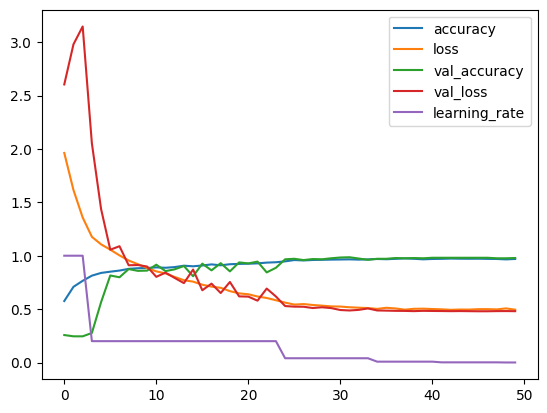

In [38]:
pd.DataFrame(history.history).plot()

I did multiple trials you can check the commits on my github but this is the best i got

`NOTE`

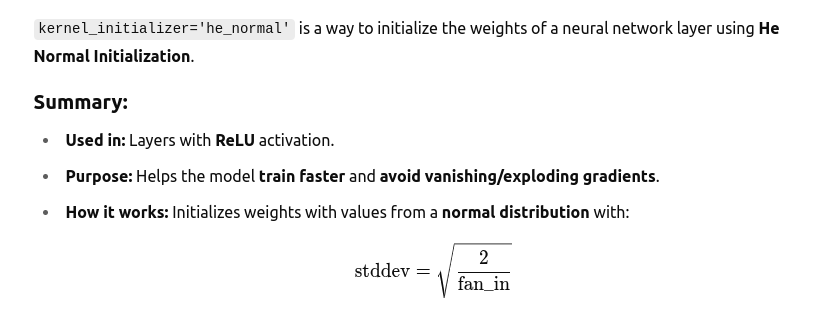

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


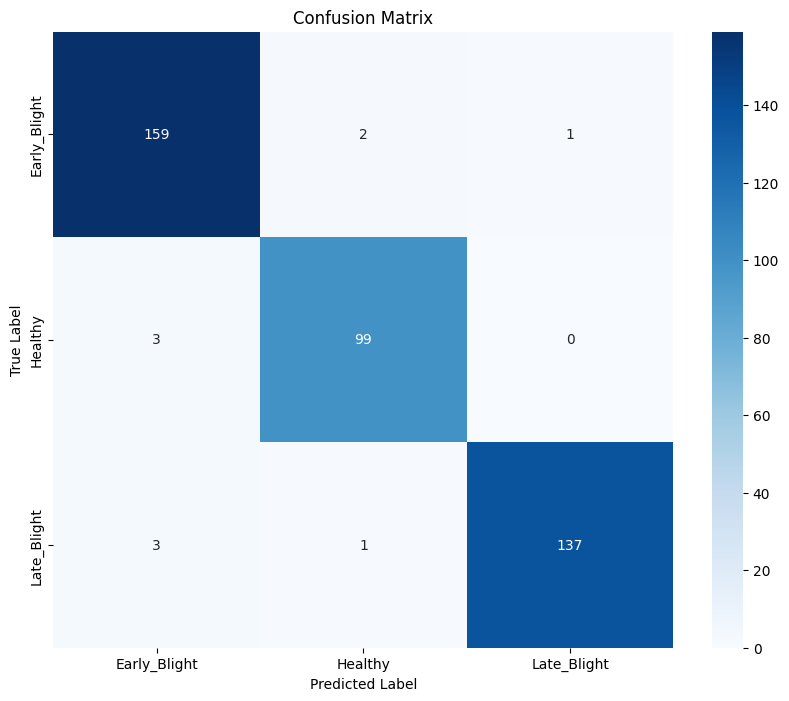

In [39]:
# print confution matrix
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
# Get the class labels
class_labels = list(test_generator.class_indices.keys())
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()